<a href="https://colab.research.google.com/github/dhwanikejriwal/AI-Systems-Development/blob/main/BoW_vs_Attention_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 – Bag-of-Words (BoW)**

In [2]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 67.3 MB/s eta 0:00:00


In [3]:
from gensim.models import Word2Vec
import numpy as np

In [4]:
s1 = "The queen who travelled across the vast kingdom govern wisely"


In [5]:
#1. Tokenixe the sentence
def tokenize(sentence):
  return sentence.lower().split()

tokens = tokenize(s1)
print(tokenize(s1))

['the', 'queen', 'who', 'travelled', 'across', 'the', 'vast', 'kingdom', 'govern', 'wisely']


In [6]:
vocab = sorted(list(set(tokens)))
vocab


['across',
 'govern',
 'kingdom',
 'queen',
 'the',
 'travelled',
 'vast',
 'who',
 'wisely']

In [7]:
#3. BoW vector

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow_vector = vectorizer.fit_transform([s1]).toarray()[0]
print("BoW Vector: " , bow_vector)

BoW Vector:  [1 1 1 1 2 1 1 1 1]


In [8]:
#4. Create a BoW co-occurrence matrix using an outer product.
cooccurence_matrix = np.outer(bow_vector , bow_vector)
print(cooccurence_matrix)

[[1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [2 2 2 2 4 2 2 2 2]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]
 [1 1 1 1 2 1 1 1 1]]


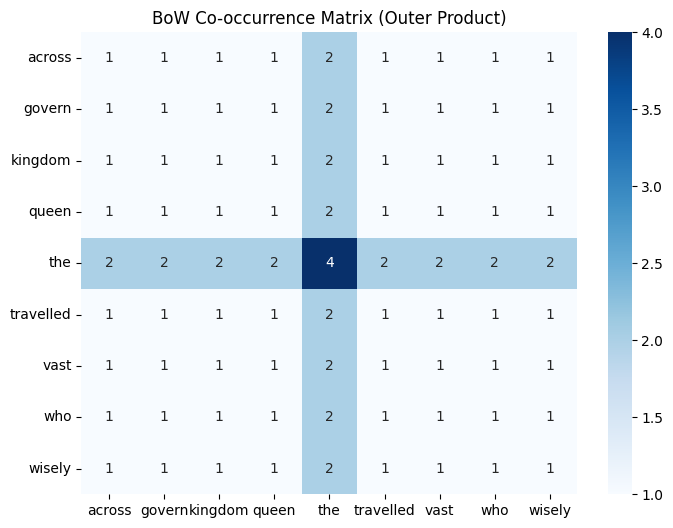

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    cooccurence_matrix,
    xticklabels=vocab,
    yticklabels=vocab,
    cmap="Blues",
    annot=True,
    fmt=".0f"
)
plt.title("BoW Co-occurrence Matrix (Outer Product)")
plt.show()


**Task 2 – Self-Attention**

In [10]:
np.random.seed(42)
d_model = 8

embeddings = np.random.randn(len(tokens), d_model)
embeddings


array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975,  0.24196227,
        -1.91328024, -1.72491783, -0.56228753],
       [-1.01283112,  0.31424733, -0.90802408, -1.4123037 ,  1.46564877,
        -0.2257763 ,  0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259, -1.15099358,  0.37569802, -0.60063869,
        -0.29169375, -0.60170661,  1.85227818],
       [-0.01349722, -1.05771093,  0.82254491, -1.22084365,  0.2088636 ,
        -1.95967012, -1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223],
       [ 0.34361829, -1.76304016,  0.32408397, -0.38508228, -0.676922  ,
         0.61167629,  1.03099952,  0.93128012],
       [-0.83921752, -0.30921238,  0.33126343,  0.97554513, -0.47917424,
        -0.18565898, -1.10633497, -1.19620662],
       [ 0.81252582,  1.35624003

In [11]:
scores = embeddings @ embeddings.T
scores


array([[ 6.19747945, -4.0818999 , -4.56271809,  0.22119239, -2.72357421,
         0.40818741,  2.39601116, -1.18323729,  3.51527526, -2.0099198 ],
       [-4.0818999 ,  7.95713359,  3.19578517,  1.08331448,  5.60012069,
         1.1597874 , -4.7248515 ,  2.43859568, -0.24602213,  3.2494367 ],
       [-4.56271809,  3.19578517,  8.17725644, -2.3933749 ,  1.03699903,
        -3.70553788, -3.0399309 ,  0.04345596, -3.2398892 ,  4.77905735],
       [ 0.22119239,  1.08331448, -2.3933749 ,  6.01342899,  0.09460324,
         2.97027193,  0.43247995, -0.80026704,  2.77040341, -0.18465453],
       [-2.72357421,  5.60012069,  1.03699903,  0.09460324,  8.97273746,
         2.00301742,  0.07075349,  0.91755565, -1.56733138, -4.72174352],
       [ 0.40818741,  1.1597874 , -3.70553788,  2.97027193,  2.00301742,
         4.71263638,  1.10018239, -0.91757422,  1.92771879, -1.75966904],
       [ 2.39601116, -4.7248515 , -3.0399309 ,  0.43247995,  0.07075349,
         1.10018239,  6.24231685, -2.05535852

In [12]:
def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum(axis=-1, keepdims=True)

attention_matrix = softmax(scores)
attention_matrix


array([[9.11217013e-01, 3.12855714e-05, 1.93431591e-05, 2.31288121e-03,
        1.21690714e-04, 2.78845879e-03, 2.03547192e-02, 5.67828606e-04,
        6.23383553e-02, 2.48424038e-04],
       [5.28189370e-06, 8.93872278e-01, 7.64624344e-03, 9.24727471e-04,
        8.46521066e-02, 9.98218294e-04, 2.77689413e-06, 3.58595559e-03,
        2.44731688e-04, 8.06768038e-03],
       [2.81490487e-06, 6.59081125e-03, 9.60205874e-01, 2.46375489e-05,
        7.61009305e-04, 6.63334155e-06, 1.29063012e-05, 2.81773208e-04,
        1.05672264e-05, 3.21029725e-02],
       [2.75668373e-03, 6.52832565e-03, 2.01787749e-04, 9.03489969e-01,
        2.42890190e-03, 4.30821153e-02, 3.40524188e-03, 9.92596520e-04,
        3.52772905e-02, 1.83708759e-03],
       [8.03344408e-06, 3.31006513e-02, 3.45221617e-04, 1.34530480e-04,
        9.65040173e-01, 9.07056712e-04, 1.31359920e-04, 3.06354585e-04,
        2.55300495e-05, 1.08920060e-06],
       [9.80360879e-03, 2.07874732e-02, 1.60257286e-04, 1.27082323e-01,
   

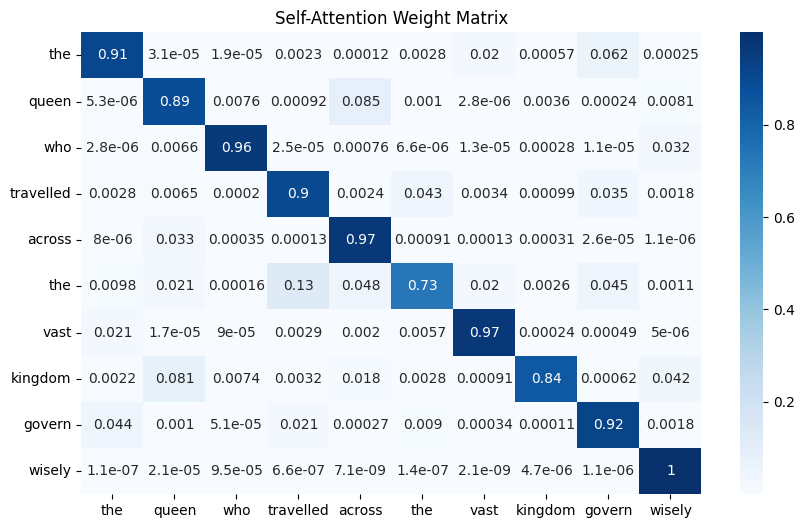

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(attention_matrix, annot=True, cmap="Blues", xticklabels=tokens, yticklabels=tokens)
plt.title("Self-Attention Weight Matrix")

plt.show()


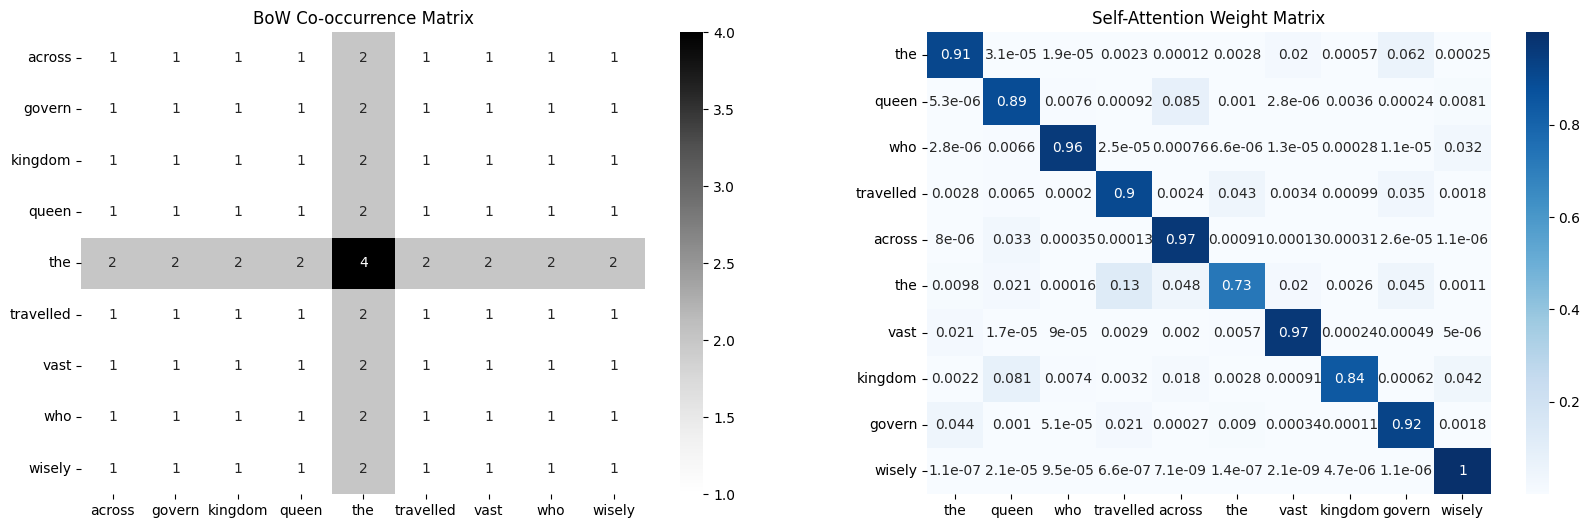

In [15]:

plt.figure(figsize=(20, 6))

# BoW
plt.subplot(1, 2, 1)
sns.heatmap(cooccurence_matrix, annot=True, cmap="Greys", xticklabels=vocab, yticklabels=vocab)
plt.title("BoW Co-occurrence Matrix")

# Attention
plt.subplot(1, 2, 2)
sns.heatmap(attention_matrix, annot=True, cmap="Blues", xticklabels=tokens, yticklabels=tokens)
plt.title("Self-Attention Weight Matrix")

plt.show()


**Task 4 – Short Answer Questions**

**1. Why can't BoW capture long-range dependencies?**

Bag-of-Words ignores word order and sequence structure. It treats a sentence as an unordered collection of tokens, so it cannot model relationships between words that depend on their positions or distance in the sentence.

**2. How does attention allow distant words to interact?**

Attention computes similarity between every pair of tokens, assigning weights that let each word directly “look at” any other word regardless of position. This enables information to flow between distant tokens in a single step.

**3. Explain “attention captures long-range dependencies.”**

Because every token can attend to every other token, attention mechanisms can model relationships between words far apart in the sequence. The dependency does not degrade with distance since attention connects them directly without relying on sequential processing.

**4. Which method scales better for long sentences and why?**

Self-attention (Transformers) generally scales better conceptually for capturing dependencies because it allows parallel processing and direct long-range interaction. However, RNNs struggle with long sequences due to vanishing gradients.
